In [1]:
import pandas as pd
import numpy as np
import env, split_scale, acquire
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = acquire.get_iris_data()
df.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [3]:
df.shape

(150, 7)

In [4]:
df.columns

Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')

In [5]:
df.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

In [6]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


I don't think these numbers need to be scaled.

In [7]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [8]:
df_excel.shape

(7049, 12)

In [9]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

In [10]:
df_excel.shape[0]

7049

In [11]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
list(df_excel.select_dtypes(object).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [13]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [14]:
nums = list(df_excel.select_dtypes(['int','float']).columns) 

df_excel[nums].max() - df_excel[nums].min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/' +\
'1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [16]:
csv_export_url = sheet_url.replace('/edit#gid=', \
                        '/export?format=csv&gid=')

In [17]:
df_google = pd.read_csv(csv_export_url)

In [18]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
df_google.shape

(891, 12)

In [20]:
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [21]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
categorical = ['Survived', 'Pclass','Sex','SibSp',
               'Parch','Embarked']

In [24]:
pd.unique(df_google[categorical].values.ravel('K'))

array([0, 1, 3, 2, 'male', 'female', 4, 5, 8, 6, 'S', 'C', 'Q', nan],
      dtype=object)

In [25]:
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Exploration

In [26]:
df = data('iris')
df.columns = ['sepal_length', 'sepal_width', 'petal_length',
              'petal_width', 'species']
train, test = split_scale.split_my_data(df,.7)

In [27]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.5,2.4,3.7,1.0,versicolor
134,6.3,2.8,5.1,1.5,virginica
138,6.4,3.1,5.5,1.8,virginica
76,6.6,3.0,4.4,1.4,versicolor
110,7.2,3.6,6.1,2.5,virginica


In [28]:
melt = pd.melt(train, 'species', var_name="measurement")
melt

,species,measurement,value
0,versicolor,sepal_length,5.5
1,virginica,sepal_length,6.3
2,virginica,sepal_length,6.4
3,versicolor,sepal_length,6.6
4,virginica,sepal_length,7.2
...,...,...,...
415,versicolor,petal_width,1.3
416,virginica,petal_width,1.7
417,setosa,petal_width,0.2
418,versicolor,petal_width,1.2


In [29]:
plt.rc('figure', figsize=(12, 7))
plt.rc('font', size=13)

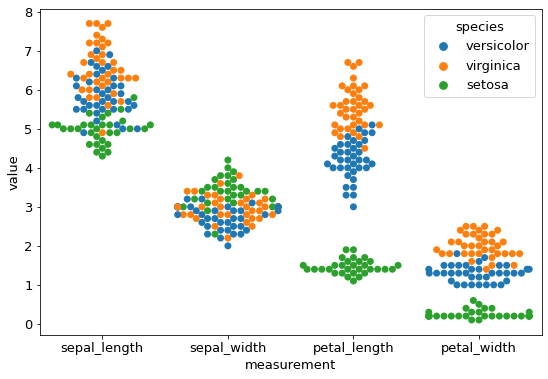

In [30]:
plt.figure(figsize=(9,6))
sns.swarmplot(x="measurement", y="value", hue='species', 
              data=melt, size=7)

Takeaways from this are that sepal measurements are difficult to use for classification, but petal would be much easier

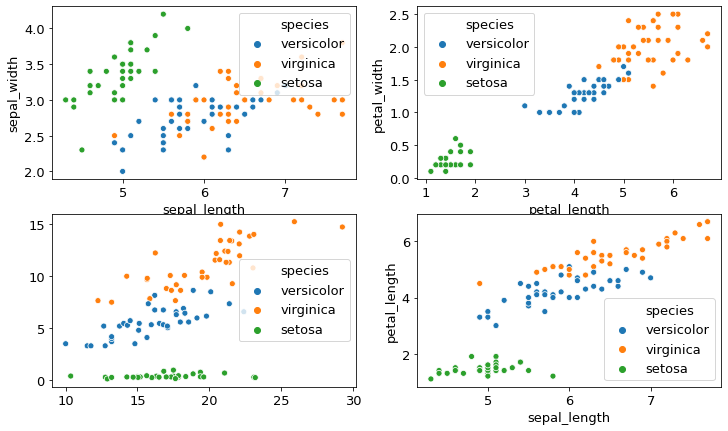

<Figure size 1008x576 with 0 Axes>

In [31]:
fig, axs = plt.subplots(2, 2)
plt.figure(figsize=(14,8))
sns.scatterplot(train.sepal_length, train.sepal_width, 
                 ax=axs[0][0], hue=train.species)
sns.scatterplot(train.petal_length, train.petal_width, 
                 ax=axs[0][1], hue=train.species)
sns.scatterplot(train.sepal_length * train.sepal_width,
                 train.petal_length * train.petal_width, 
                 ax=axs[1][0], hue=train.species)
sns.scatterplot(train.sepal_length, train.petal_length, 
                 ax=axs[1][1], hue=train.species)
plt.show()

Takeaways are that the new area feature makes sepal measurements much more useful, making species much more easily distinguishable

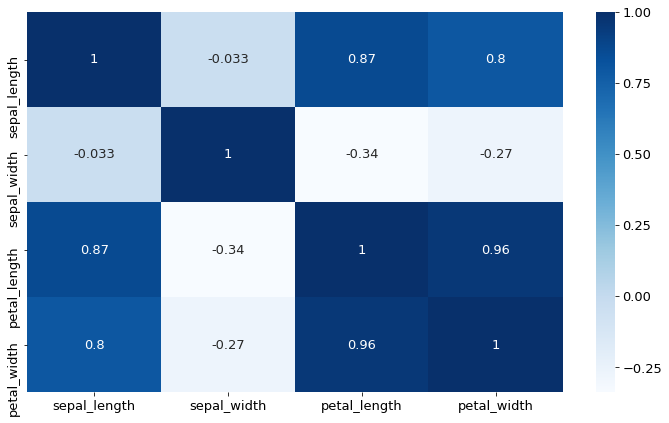

In [32]:
R = train.corr()
sns.heatmap(R, annot=True, cmap='Blues')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

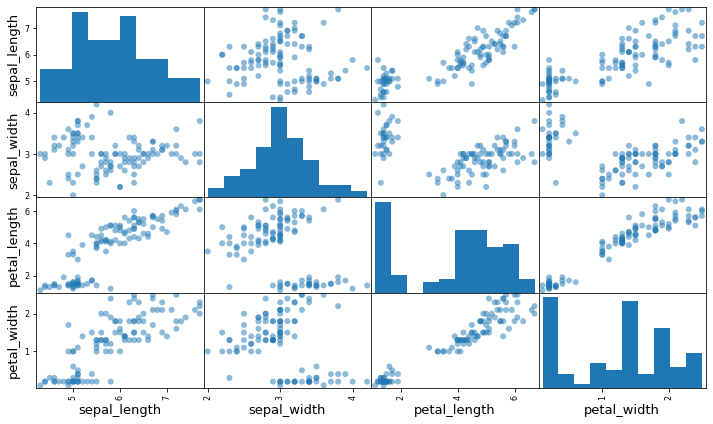

In [33]:
cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train.drop(columns='species'), marker='o')#, s=40,)
    #hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

In [35]:
sns.__version__

'0.9.0'

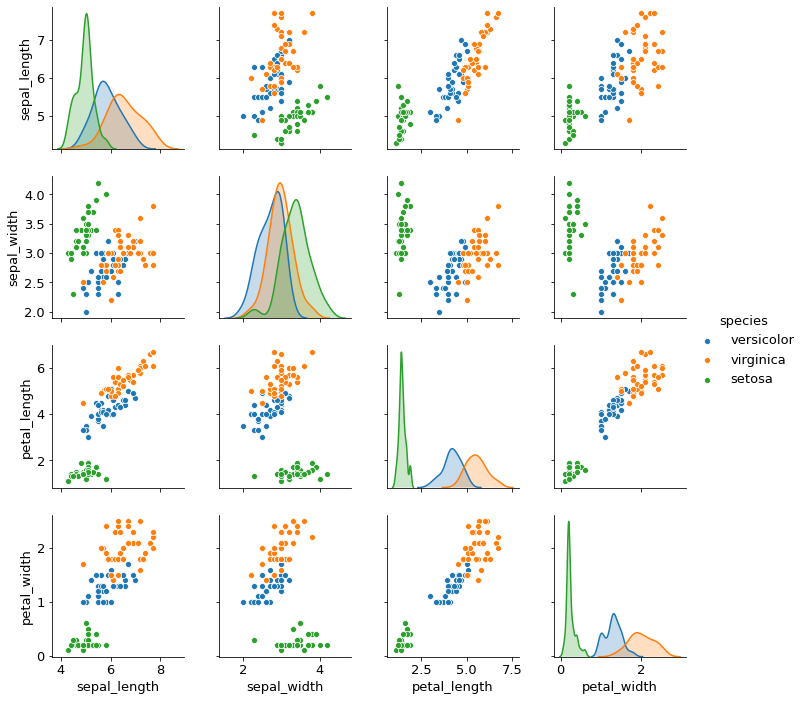

In [36]:
# sns.pairplot(train, hue='species', corner=True)
sns.pairplot(train, hue="species")

### Null Hypothesis: the difference in sepal length between virginica and versicolor is insignificant

### Alternative Hypothesis: the difference in sepal length between virginica and versicolor is substantial

In [ ]:
t_stat, p = stats.ttest_ind(
    train[train.species=='virginica'].sepal_length,
    train[train.species=='versicolor'].sepal_length)
t_stat, p

A p value of nearly 0 means we must reject our null hypothesis. A significant difference in sepal length means we should use it as a feature.